XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import accuracy_score,classification_report

data=pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')

data = data.dropna(subset=['target']) 
data.head()
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target']=data['target'].map({'Dropout':0,'Graduate':1,'Enrolled': 2})

from sklearn.preprocessing import LabelEncoder

X=data.drop(columns=['Application mode','Application order','target','Curricular units 2nd sem (without evaluations)'])
y=data['target']

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model=XGBClassifier(learning_rate=0.3,max_depth=10)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print('accuracy=',acc)

rscore=classification_report(y_test,y_pred)
print('r2_score=',rscore)

explainer = shap.TreeExplainer(model)  # optimized for tree-based models
shap_values = explainer.shap_values(X_test)

# Initialize SHAP JS
shap.initjs()

# Define class names
class_names = ['Dropout', 'Graduate', 'Enrolled']

# Use waterfall plot instead of force plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import accuracy_score,classification_report

data=pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')

data = data.dropna(subset=['target']) 
data.head()
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target']=data['target'].map({'Dropout':0,'Graduate':1,'Enrolled': 2})

from sklearn.preprocessing import LabelEncoder

X=data.drop(columns=['Application mode','Application order','target','Curricular units 2nd sem (without evaluations)'])
y=data['target']

cat_features = X.select_dtypes(include='object').columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)


model=CatBoostClassifier(verbose=0, iterations=700, learning_rate=0.01, depth=10)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print('accuracy=',acc)

rscore=classification_report(y_test,y_pred)
print('r2_score=',rscore)

explainer = shap.TreeExplainer(model)  # optimized for tree-based models
shap_values = explainer.shap_values(X_test)

# Initialize SHAP JS
shap.initjs()

# Define class names
class_names = ['Dropout', 'Graduate', 'Enrolled']

# Use waterfall plot instead of force plot
predicted_class = int(model.predict_proba(X_test)[0].argmax())
predicted_class = int(model.predict_proba(X_test)[0].argmax())
shap.waterfall_plot(shap.Explanation(values=shap_values[predicted_class][0], 
                                    base_values=explainer.expected_value[predicted_class], 
                                    data=X_test.iloc[0]))
plt.show()

# 2. Overall summary plot (should work as-is)
print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, X_test)

# 3. Dependence plot with correct column name
print("\n=== Dependence Plot ===")
# Look for age-related columns
age_cols = [col for col in X_test.columns if any(word in col.lower() for word in ['Age', 'enrollment'])]
print(f"Potential age columns: {age_cols}")

if age_cols:
    # Use the first age-related column found
    shap.dependence_plot(age_cols[0], shap_values[0], X_test)
else:
    # If no age column, use the most important feature
    feature_importance = np.abs(shap_values[0]).mean(axis=0)
    most_important_feature = X_test.columns[np.argmax(feature_importance)]
    print(f"Using most important feature instead: {most_important_feature}")
    shap.dependence_plot(most_important_feature, shap_values[0], X_test)
shap.waterfall_plot(shap.Explanation(values=shap_values[predicted_class][0], 
                                    base_values=explainer.expected_value[predicted_class], 
                                    data=X_test.iloc[0]))
plt.show()

# 2. Overall summary plot (should work as-is)
print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, X_test)

# 3. Dependence plot with correct column name
print("\n=== Dependence Plot ===")
# Look for age-related columns
age_cols = [col for col in X_test.columns if any(word in col.lower() for word in ['Age', 'enrollment'])]
print(f"Potential age columns: {age_cols}")

if age_cols:
    # Use the first age-related column found
    shap.dependence_plot(age_cols[0], shap_values[0], X_test)
else:
    # If no age column, use the most important feature
    feature_importance = np.abs(shap_values[0]).mean(axis=0)
    most_important_feature = X_test.columns[np.argmax(feature_importance)]
    print(f"Using most important feature instead: {most_important_feature}")
    shap.dependence_plot(most_important_feature, shap_values[0], X_test)

accuracy= 0.7595890410958904
r2_score=               precision    recall  f1-score   support

           0       0.80      0.76      0.78       486
           1       0.78      0.91      0.84       705
           2       0.54      0.36      0.43       269

    accuracy                           0.76      1460
   macro avg       0.71      0.68      0.69      1460
weighted avg       0.75      0.76      0.75      1460



accuracy= 0.7575301204819277
r2_score=               precision    recall  f1-score   support

           0       0.81      0.77      0.79       441
           1       0.76      0.93      0.84       642
           2       0.55      0.30      0.39       245

    accuracy                           0.76      1328
   macro avg       0.71      0.66      0.67      1328
weighted avg       0.74      0.76      0.74      1328



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import accuracy_score,classification_report

data=pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')

data = data.dropna(subset=['target']) 
data.head()
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target']=data['target'].map({'Dropout':0,'Graduate':1,'Enrolled': 2})

from sklearn.preprocessing import LabelEncoder

X=data.drop(columns=['Application mode','Application order','target','Curricular units 2nd sem (without evaluations)'])
y=data['target']

cat_features = X.select_dtypes(include='object').columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)


model=CatBoostClassifier(verbose=0, iterations=500, learning_rate=0.01, depth=10)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print('accuracy=',acc)

rscore=classification_report(y_test,y_pred)
print('r2_score=',rscore)

explainer = shap.TreeExplainer(model)  # optimized for tree-based models
shap_values = explainer.shap_values(X_test)

# Initialize SHAP JS
shap.initjs()

# Define class names
class_names = ['Dropout', 'Graduate', 'Enrolled']

# Use waterfall plot instead of force plot
predicted_class = int(model.predict_proba(X_test)[0].argmax())
shap.waterfall_plot(shap.Explanation(values=shap_values[predicted_class][0], 
                                    base_values=explainer.expected_value[predicted_class], 
                                    data=X_test.iloc[0]))
plt.show()

# 2. Overall summary plot (should work as-is)
print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, X_test)

# 3. Dependence plot with correct column name
print("\n=== Dependence Plot ===")
# Look for age-related columns
age_cols = [col for col in X_test.columns if any(word in col.lower() for word in ['Age', 'enrollment'])]
print(f"Potential age columns: {age_cols}")

if age_cols:
    # Use the first age-related column found
    shap.dependence_plot(age_cols[0], shap_values[0], X_test)
else:
    # If no age column, use the most important feature
    feature_importance = np.abs(shap_values[0]).mean(axis=0)
    most_important_feature = X_test.columns[np.argmax(feature_importance)]
    print(f"Using most important feature instead: {most_important_feature}")
    shap.dependence_plot(most_important_feature, shap_values[0], X_test)

accuracy= 0.7552710843373494
r2_score=               precision    recall  f1-score   support

           0       0.81      0.76      0.78       441
           1       0.76      0.94      0.84       642
           2       0.56      0.27      0.36       245

    accuracy                           0.76      1328
   macro avg       0.71      0.65      0.66      1328
weighted avg       0.74      0.76      0.73      1328



accuracy= 0.7628012048192772
r2_score=               precision    recall  f1-score   support

           0       0.81      0.77      0.79       441
           1       0.76      0.95      0.85       642
           2       0.57      0.26      0.35       245

    accuracy                           0.76      1328
   macro avg       0.71      0.66      0.66      1328
weighted avg       0.74      0.76      0.74      1328



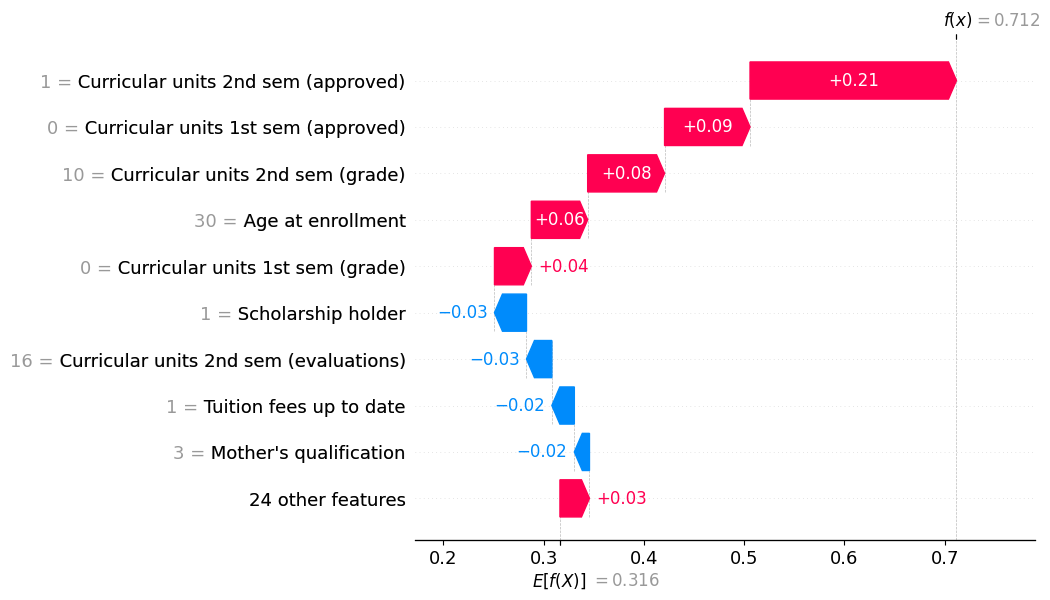


=== Overall Summary Plot ===


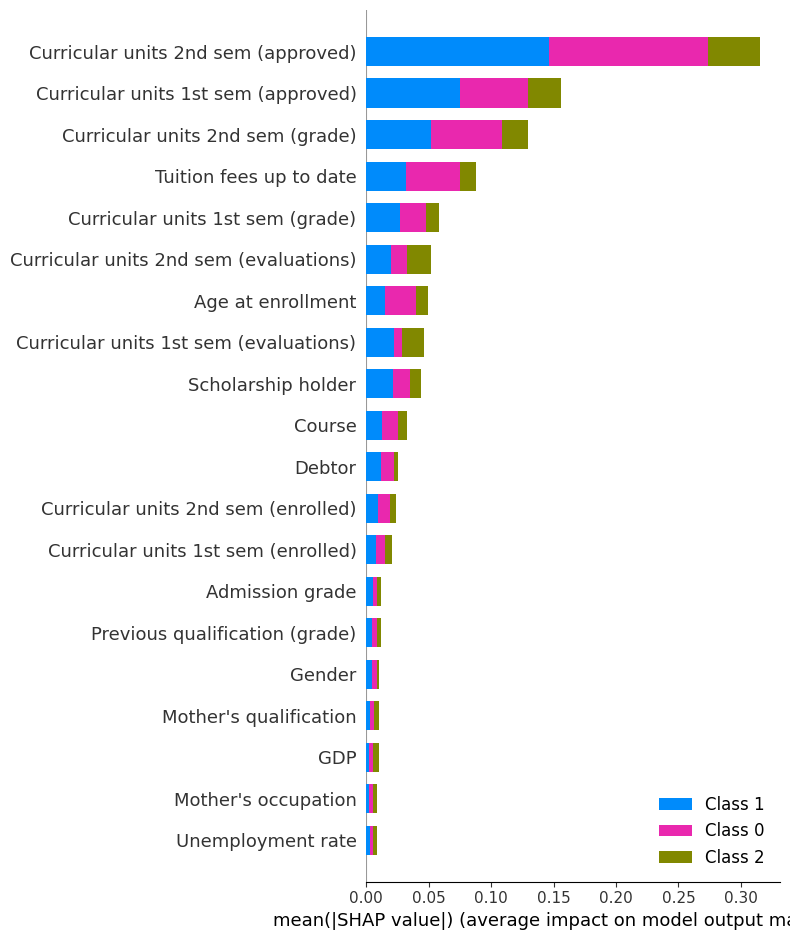


=== Dependence Plot ===
Potential age columns: ['Age at enrollment']


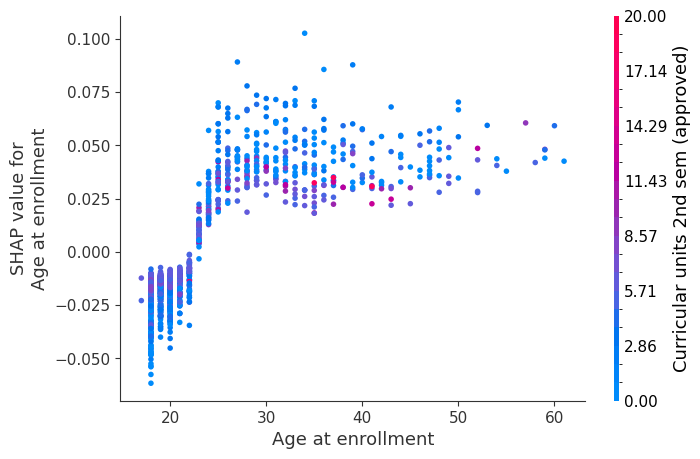

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import accuracy_score,classification_report

data=pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')

data = data.dropna(subset=['target']) 
data.head()
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target']=data['target'].map({'Dropout':0,'Graduate':1,'Enrolled': 2})

from sklearn.preprocessing import LabelEncoder

X=data.drop(columns=['Application mode','Application order','target','Curricular units 2nd sem (without evaluations)'])
y=data['target']

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])
        
cat_features = X.select_dtypes(include='object').columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


model=RandomForestClassifier(n_estimators=100,verbose=0, random_state=56, max_depth=10)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print('accuracy=',acc)

rscore=classification_report(y_test,y_pred)
print('r2_score=',rscore)

explainer = shap.TreeExplainer(model)  # optimized for tree-based models
shap_values = explainer.shap_values(X_test)

# Initialize SHAP JS
shap.initjs()

# Define class names
class_names = ['Dropout', 'Graduate', 'Enrolled']

# Use waterfall plot instead of force plot
predicted_class = int(model.predict_proba(X_test)[0].argmax())
shap.waterfall_plot(shap.Explanation(values=shap_values[predicted_class][0], 
                                    base_values=explainer.expected_value[predicted_class], 
                                    data=X_test.iloc[0]))
plt.show()

# 2. Overall summary plot (should work as-is)
print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, X_test)

# 3. Dependence plot with correct column name
print("\n=== Dependence Plot ===")
# Look for age-related columns
age_cols = [col for col in X_test.columns if any(word in col.lower() for word in ['Age', 'enrollment'])]
print(f"Potential age columns: {age_cols}")

if age_cols:
    # Use the first age-related column found
    shap.dependence_plot(age_cols[0], shap_values[0], X_test)
else:
    # If no age column, use the most important feature
    feature_importance = np.abs(shap_values[0]).mean(axis=0)
    most_important_feature = X_test.columns[np.argmax(feature_importance)]
    print(f"Using most important feature instead: {most_important_feature}")
    shap.dependence_plot(most_important_feature, shap_values[0], X_test)

Accuracy = 0.7070783132530121
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.73       441
           1       0.70      0.91      0.79       642
           2       0.44      0.27      0.33       245

    accuracy                           0.71      1328
   macro avg       0.66      0.61      0.62      1328
weighted avg       0.70      0.71      0.69      1328



  0%|          | 0/1 [00:00<?, ?it/s]

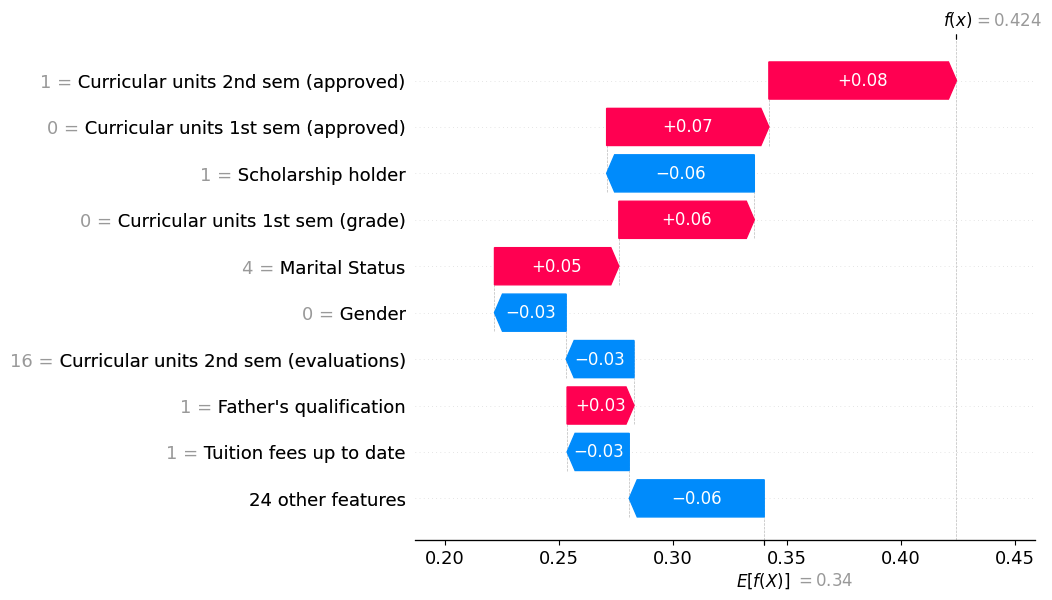


=== Overall Summary Plot ===


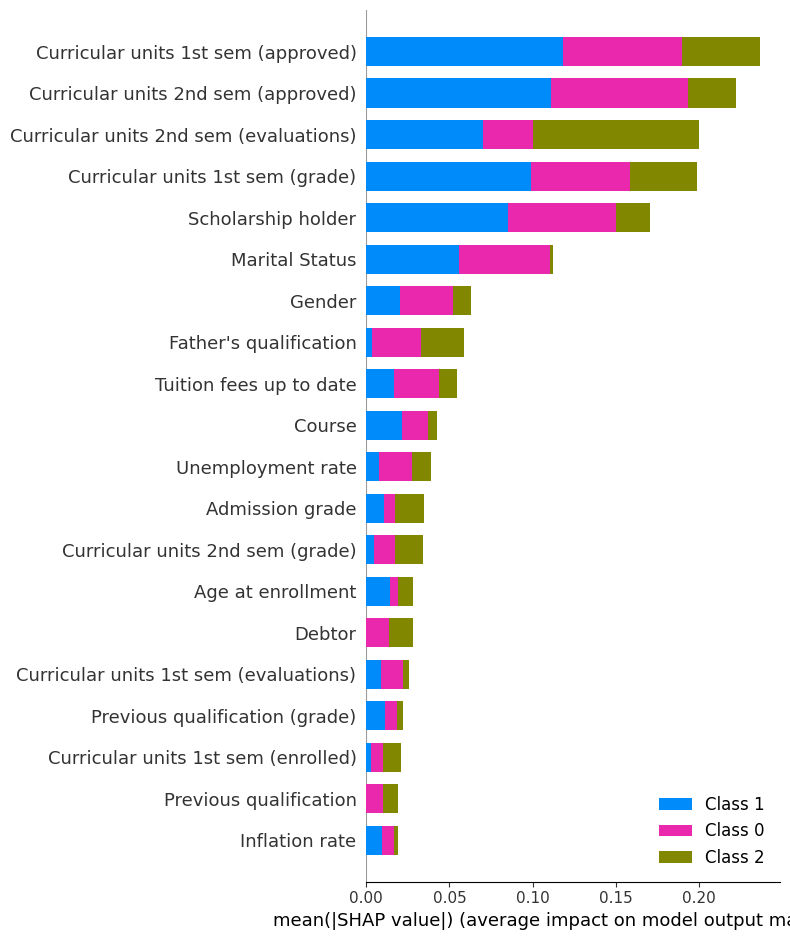

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import shap

# Load and preprocess data
data = pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')
data = data.dropna(subset=['target']) 
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target'] = data['target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

X = data.drop(columns=['Application mode','Application order','target','Curricular units 2nd sem (without evaluations)'])
y = data['target']

# Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model
model = KNeighborsClassifier(n_neighbors=7, weights='distance')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# SHAP with KernelExplainer (sample only 50 rows)
background = X_train_scaled[:50]
explainer = shap.KernelExplainer(model.predict_proba, background)

# Explain only 1 sample to avoid timeout
shap_values = explainer.shap_values(X_test_scaled[:1])

# Visualize
shap.initjs()
predicted_class = int(model.predict(X_test_scaled[:1])[0])
shap.waterfall_plot(shap.Explanation(
    values=shap_values[predicted_class][0],
    base_values=explainer.expected_value[predicted_class],
    data=X_test.iloc[0],
    feature_names=X.columns
))

print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, X_test)


Accuracy = 0.7515060240963856
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       441
           1       0.75      0.93      0.83       642
           2       0.52      0.31      0.39       245

    accuracy                           0.75      1328
   macro avg       0.70      0.66      0.67      1328
weighted avg       0.74      0.75      0.73      1328



  0%|          | 0/1 [00:00<?, ?it/s]

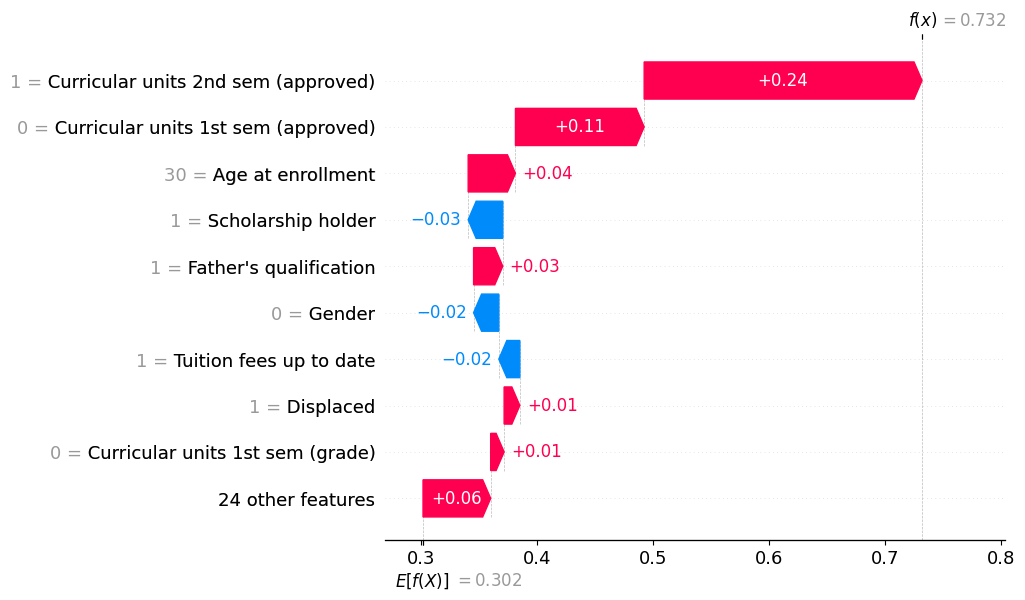


=== Overall Summary Plot ===


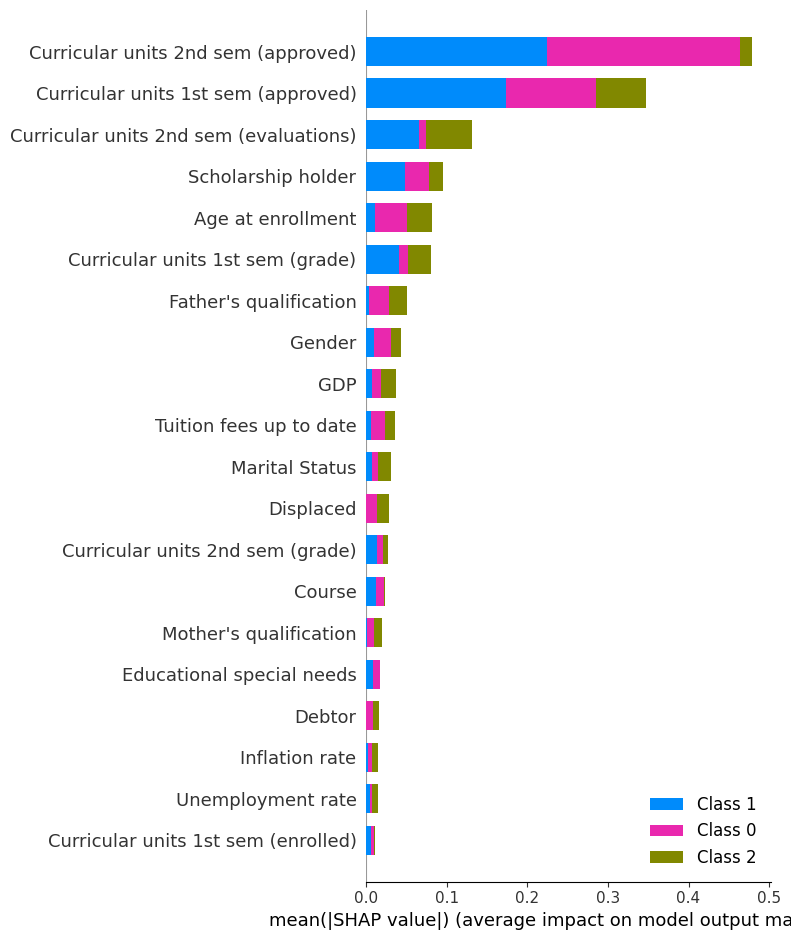

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import shap

# Load and preprocess data
data = pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')
data = data.dropna(subset=['target']) 
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target'] = data['target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

X = data.drop(columns=['Application mode','Application order','target','Curricular units 2nd sem (without evaluations)'])
y = data['target']

# Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model
model = SVC(kernel='rbf', C=1, probability=True)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# SHAP with KernelExplainer (sample only 50 rows)
background = X_train_scaled[:50]
explainer = shap.KernelExplainer(model.predict_proba, background)

# Explain only 1 sample to avoid timeout
shap_values = explainer.shap_values(X_test_scaled[:1])

# Visualize
shap.initjs()
predicted_class = int(model.predict(X_test_scaled[:1])[0])
shap.waterfall_plot(shap.Explanation(
    values=shap_values[predicted_class][0],
    base_values=explainer.expected_value[predicted_class],
    data=X_test.iloc[0],
    feature_names=X.columns
))

print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, X_test)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [11]:
data.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [15]:
zero_counts = (data == 0).sum()
zero_counts_sorted = zero_counts.sort_values(ascending=False)
# 3. Display the result
print("Number of zeros in each column:")
print(zero_counts_sorted)

Number of zeros in each column:
Educational special needs                         4373
International                                     4314
Curricular units 2nd sem (without evaluations)    4142
Curricular units 1st sem (without evaluations)    4130
Debtor                                            3921
Curricular units 2nd sem (credited)               3894
Curricular units 1st sem (credited)               3847
Scholarship holder                                3325
Gender                                            2868
Displaced                                         1998
target                                            1421
Curricular units 2nd sem (approved)                870
Curricular units 2nd sem (grade)                   870
Curricular units 1st sem (grade)                   718
Curricular units 1st sem (approved)                718
Tuition fees up to date                            528
Daytime/evening attendance                         483
Curricular units 2nd sem (evaluat

Epoch 1/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4762 - loss: 1.0758 - val_accuracy: 0.5744 - val_loss: 0.9588
Epoch 2/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5628 - loss: 0.9684 - val_accuracy: 0.5577 - val_loss: 0.9583
Epoch 3/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5536 - loss: 0.9671 - val_accuracy: 0.5705 - val_loss: 0.9607
Epoch 4/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5564 - loss: 0.9607 - val_accuracy: 0.5675 - val_loss: 0.9533
Epoch 5/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5643 - loss: 0.9531 - val_accuracy: 0.5705 - val_loss: 0.9507
Epoch 6/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5763 - loss: 0.9479 - val_accuracy: 0.5587 - val_loss: 0.9590
Epoch 7/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5889 - loss: 0.9405 - val_accuracy: 0.5714 - val_loss: 0.9500
Epoch 8/1000
2074/2074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5769 -

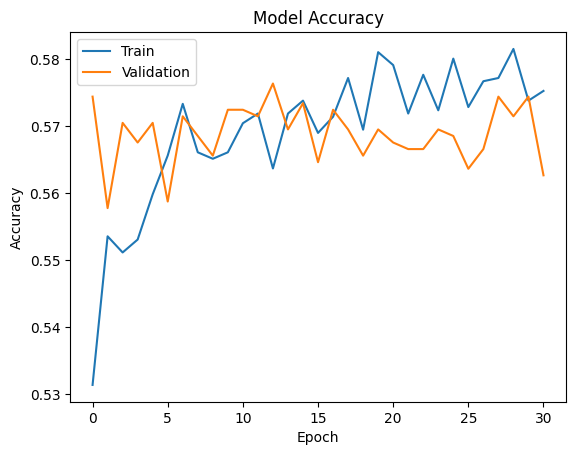

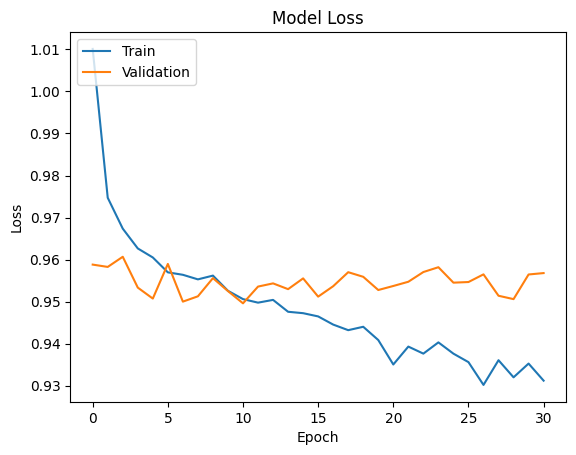

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
 [[167 274   0]
 [ 82 560   0]
 [ 60 185   0]]
Accuracy: 0.5474397590361446
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.38      0.45       441
           1       0.55      0.87      0.67       642
           2       0.00      0.00      0.00       245

    accuracy                           0.55      1328
   macro avg       0.36      0.42      0.37      1328
weighted avg       0.45      0.55      0.47      1328

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


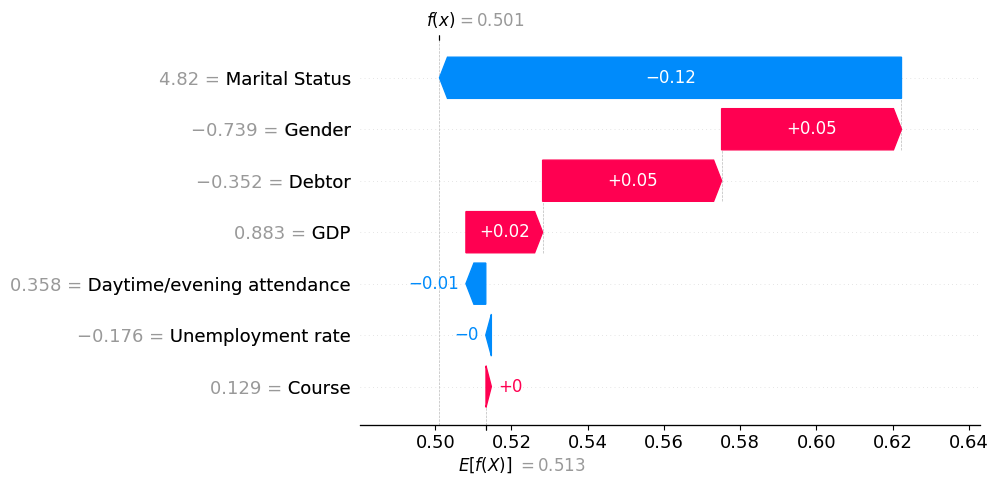


=== Overall Summary Plot ===


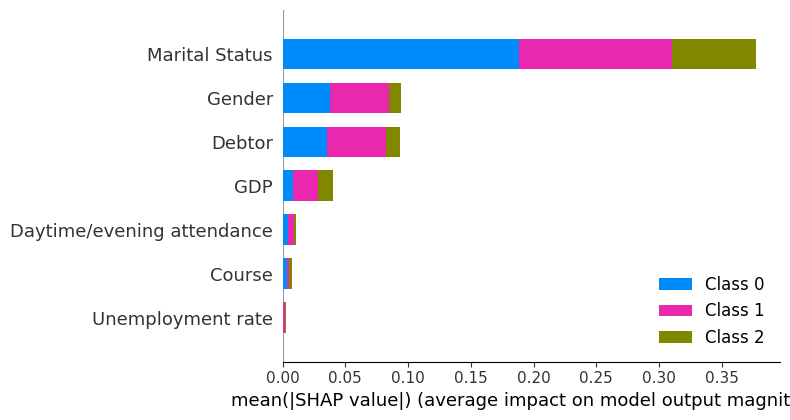

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
data = pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')
data = data.dropna(subset=['target']) 
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target'] = data['target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

X = data[['Marital Status', 'Course', 'Daytime/evening attendance', 'Debtor', 'Gender', 'Unemployment rate', 'GDP']]
y = data['target']

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network
classifier = Sequential()
classifier.add(Dense(units=20, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=14, activation='relu'))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(3, activation='softmax'))  # 3 classes

# Optimizer
opt = Adam(learning_rate=0.001)
classifier.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

# Training
model_history = classifier.fit(X_train_scaled, y_train, validation_split=0.33, batch_size=1, epochs=1000, callbacks=[early_stopping])

# Accuracy and loss plots
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prediction
y_pred = classifier.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)  # Convert from one-hot-like to class label

# Evaluation
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("Classification Report:\n", cr)

# SHAP with KernelExplainer (slow, so use a sample)
background = shap.sample(X_train_scaled, 50, random_state=0)
explainer = shap.KernelExplainer(classifier.predict, background)

# Explain only the first sample to reduce time
shap_values = explainer.shap_values(X_test_scaled[:1])

# SHAP visualizations
shap.initjs()
predicted_class = np.argmax(classifier.predict(X_test_scaled[:1]))
shap.waterfall_plot(shap.Explanation(
    values=shap_values[predicted_class][0],
    base_values=explainer.expected_value[predicted_class],
    data=X_test_scaled[0],
    feature_names=X.columns
))

print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess data
data = pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')
data = data.dropna(subset=['target']) 
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target'] = data['target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

X = data[['Marital Status', 'Course', 'Daytime/evening attendance', 'Debtor', 'Gender', 'Unemployment rate', 'GDP']]
y = data['target']

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')),
    ('svm', SVC(probability=True, random_state=42))  # probability=True for predict_proba
]

# Define meta-model
meta_model = LogisticRegression(random_state=42)

# Generate meta-features using cross-validation
meta_features = np.zeros((X_train.shape[0], len(base_models) * len(np.unique(y))))
meta_features_test = np.zeros((X_test.shape[0], len(base_models) * len(np.unique(y))))

for i, (name, model) in enumerate(base_models):
    # Fit model for test predictions
    model.fit(X_train, y_train)
    # Generate probability predictions for each class
    probs = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')
    probs_test = model.predict_proba(X_test)
    # Store probabilities for each class
    for j in range(len(np.unique(y))):
        meta_features[:, i * len(np.unique(y)) + j] = probs[:, j]
        meta_features_test[:, i * len(np.unique(y)) + j] = probs_test[:, j]

# Train meta-model
meta_model.fit(meta_features, y_train)

# Make final predictions
final_predictions = meta_model.predict(meta_features_test)

# Evaluate performance with multiclass metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')

print(f"\nStacking Model Performance (Multiclass):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

# Compare with a single model (Random Forest)
single_model = RandomForestClassifier(n_estimators=100, random_state=42)
single_model.fit(X_train, y_train)
single_pred = single_model.predict(X_test)
print(f"\nSingle Model (Random Forest) Performance:")
print(f"Accuracy: {accuracy_score(y_test, single_pred):.4f}")
print(f"Precision (weighted): {precision_score(y_test, single_pred, average='weighted'):.4f}")


Stacking Model Performance (Multiclass):
Accuracy: 0.5718
Precision (weighted): 0.6401
Recall (weighted): 0.5718
F1-Score (weighted): 0.5074

Single Model (Random Forest) Performance:
Accuracy: 0.5616
Precision (weighted): 0.5257



=== Stacking Model Performance ===
Accuracy = 0.7801204819277109
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       441
           1       0.80      0.91      0.85       642
           2       0.58      0.39      0.47       245

    accuracy                           0.78      1328
   macro avg       0.73      0.70      0.71      1328
weighted avg       0.77      0.78      0.77      1328


=== Single SVM Model Performance ===
Accuracy = 0.7515060240963856
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       441
           1       0.75      0.93      0.83       642
           2       0.52      0.31      0.39       245

    accuracy                           0.75      1328
   macro avg       0.70      0.66      0.67      1328
weighted avg       0.74      0.75      0.73      1328



  0%|          | 0/1 [00:00<?, ?it/s]

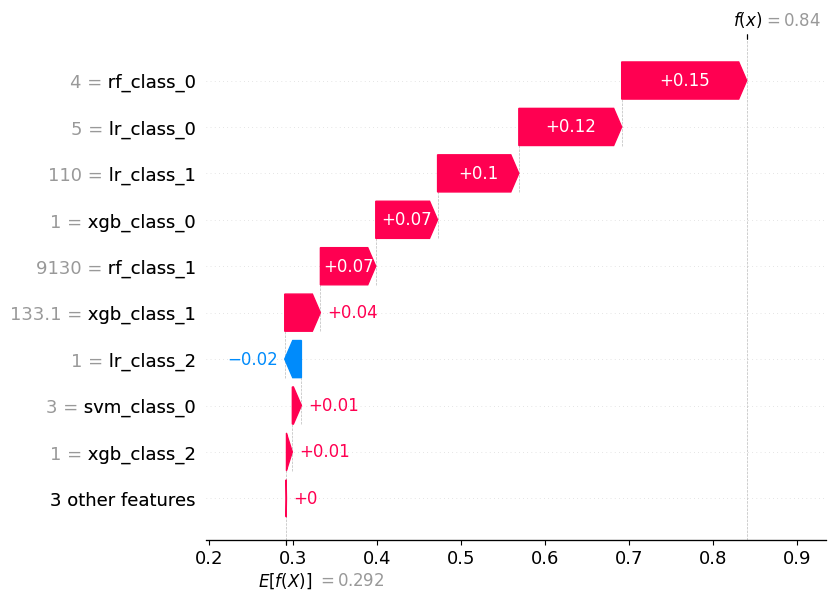


=== Overall Summary Plot ===


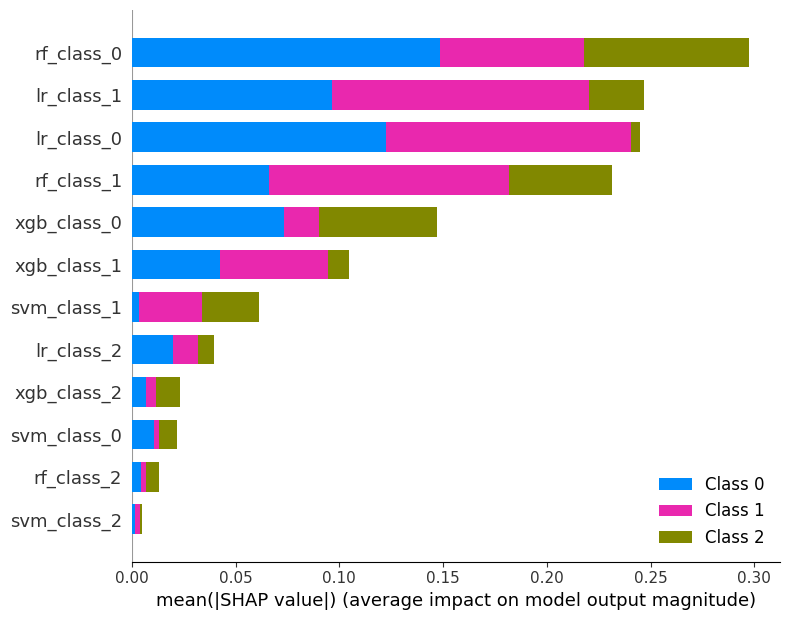

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
import shap

# Load and preprocess data
data = pd.read_csv('/kaggle/input/d/adilshamim8/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')
data = data.dropna(subset=['target']) 
data['target'] = data['target'].astype(str).str.strip().str.capitalize()
data['target'] = data['target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

X = data.drop(columns=['Application mode','Application order','target','Curricular units 2nd sem (without evaluations)'])
y = data['target']

# Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')),
    ('svm', SVC(kernel='rbf', C=1, probability=True, random_state=42)),
    ('lr', LogisticRegression(multi_class='multinomial', random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(multi_class='multinomial', random_state=42)

# Generate meta-features using cross-validation
n_classes = len(np.unique(y))  # 3 classes: Dropout, Graduate, Enrolled
meta_features = np.zeros((X_train_scaled.shape[0], len(base_models) * n_classes))
meta_features_test = np.zeros((X_test_scaled.shape[0], len(base_models) * n_classes))

for i, (name, model) in enumerate(base_models):
    # Generate out-of-fold predictions for meta-features
    probs = cross_val_predict(model, X_train_scaled, y_train, cv=5, method='predict_proba')
    # Fit model on full training data for test predictions
    model.fit(X_train_scaled, y_train)
    probs_test = model.predict_proba(X_test_scaled)
    # Store probabilities for each class
    for j in range(n_classes):
        meta_features[:, i * n_classes + j] = probs[:, j]
        meta_features_test[:, i * n_classes + j] = probs_test[:, j]

# Train meta-model
meta_model.fit(meta_features, y_train)

# Make final predictions
stacked_pred = meta_model.predict(meta_features_test)

# Evaluate stacking model
print("\n=== Stacking Model Performance ===")
print("Accuracy =", accuracy_score(y_test, stacked_pred))
print("Classification Report:\n", classification_report(y_test, stacked_pred))

# Compare with single SVM model
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print("\n=== Single SVM Model Performance ===")
print("Accuracy =", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

# SHAP with KernelExplainer for stacking model (sample only 50 rows)
background = X_train_scaled[:50]
explainer = shap.KernelExplainer(meta_model.predict_proba, meta_features[:50])

# Explain only 1 sample to avoid timeout
shap_values = explainer.shap_values(meta_features_test[:1])

# Visualize
shap.initjs()
predicted_class = int(meta_model.predict(meta_features_test[:1])[0])
shap.waterfall_plot(shap.Explanation(
    values=shap_values[predicted_class][0],
    base_values=explainer.expected_value[predicted_class],
    data=X_test.iloc[0],  # Using original features for interpretability
    feature_names=[f"{model[0]}_class_{i}" for model in base_models for i in range(n_classes)]
))

print("\n=== Overall Summary Plot ===")
shap.summary_plot(shap_values, meta_features_test, feature_names=[f"{model[0]}_class_{i}" for model in base_models for i in range(n_classes)])